In [1]:
import numpy as np
import pandas as pd

In [2]:
g1 = pd.DataFrame(np.random.randint(80,100, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g2 = pd.DataFrame(np.random.randint(70,79, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g3 = pd.DataFrame(np.random.randint(60,69, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g4 = pd.DataFrame(np.random.randint(50,59, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g5 = pd.DataFrame(np.random.randint(40,49, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g6 = pd.DataFrame(np.random.randint(33,39, size=(800000,5)), columns = ["s1",'s2','s3','s4','s5'])
g7 = pd.DataFrame(np.random.randint(0,32, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])

df = pd.concat([g1,g2,g3,g4,g5,g6,g7])
print(len(df))
df = df.drop_duplicates()# get all unique records
print(len(df))
df.head()

1040000
203654


,s1,s2,s3,s4,s5
0,95,95,86,89,97
1,99,82,86,91,89
2,88,96,92,82,86
3,93,89,85,82,93
4,88,92,95,96,81


In [3]:
df.tail()

,s1,s2,s3,s4,s5
39994,6,5,25,6,3
39996,27,25,5,12,27
39997,5,18,24,14,14
39998,15,18,19,9,11
39999,24,9,26,5,21


# Symbolic AI

In [4]:
def grade(sb1,sb2, sb3, sb4, sb5):
    total = 500
    obtain = sb1 + sb2 + sb3 + sb4 + sb5
    per = (obtain / total) * 100
    
    grade = None
    
    if per >= 80:
        grade = "A+"
    elif per >= 70:
        grade = "A"
    elif per >= 60:
        grade = "B"
    elif per >= 50:
        grade = "C"
    elif per >= 40:
        grade = "D"
    elif per >= 33:
        grade = "E"
    else:
        grade = "Fail"
        
    return total, obtain , per , grade

# df[["Total","Obtained","Percentage","Grade"]] = df[["s1","s2","s3","s4","s5"]].apply(lambda x:grade(*x), axis=1, result_type='expand')
df[["Total","Obtained","Percentage","Grade"]] = df[["s1","s2","s3","s4","s5"]].apply(lambda x:grade(x[0],x[1],x[2],x[3],x[4]), axis=1, result_type='expand')
df

,s1,s2,s3,s4,s5,Total,Obtained,Percentage,Grade
0,95,95,86,89,97,500,462,92.4,A+
1,99,82,86,91,89,500,447,89.4,A+
2,88,96,92,82,86,500,444,88.8,A+
3,93,89,85,82,93,500,442,88.4,A+
4,88,92,95,96,81,500,452,90.4,A+
...,...,...,...,...,...,...,...,...,...
39994,6,5,25,6,3,500,45,9.0,Fail
39996,27,25,5,12,27,500,96,19.2,Fail
39997,5,18,24,14,14,500,75,15.0,Fail
39998,15,18,19,9,11,500,72,14.4,Fail


In [5]:
df.Grade.value_counts()

Fail    39988
A+      39744
D       29203
C       29012
B       29006
A       28925
E        7776
Name: Grade, dtype: int64

In [6]:
df1 = pd.DataFrame()
test = pd.DataFrame()
for i in df.Grade.unique():
    df1 = pd.concat([df1,df[df.Grade==i].head(7776)])
    test = pd.concat([test,df[df.Grade==i].head(100)])
print(len(df1))
print(len(test))

54432
700


# Create data for ML

In [8]:
data = df1[["s1","s2","s3",'s4','s5',"Percentage",'Grade']].copy()
data = data.sample(frac=1)
data

,s1,s2,s3,s4,s5,Percentage,Grade
2875,77,74,74,77,71,74.6,A
4717,36,35,38,33,34,35.2,E
5305,71,75,78,77,74,75.0,A
917,34,36,37,34,38,35.8,E
5455,52,50,54,55,54,53.0,C
...,...,...,...,...,...,...,...
7396,15,25,12,7,28,17.4,Fail
6104,72,78,74,76,72,74.4,A
3671,60,65,66,67,62,64.0,B
7613,46,40,47,40,47,44.0,D


In [9]:
data.corr()

,s1,s2,s3,s4,s5,Percentage
s1,1.000000,0.961079,0.961584,0.961478,0.961096,0.984472
s2,0.961079,1.000000,0.960895,0.961855,0.960543,0.984270
s3,0.961584,0.960895,1.000000,0.961271,0.961040,0.984364
s4,0.961478,0.961855,0.961271,1.000000,0.961103,0.984532
s5,0.961096,0.960543,0.961040,0.961103,1.000000,0.984139
Percentage,0.984472,0.984270,0.984364,0.984532,0.984139,1.000000


<AxesSubplot:>

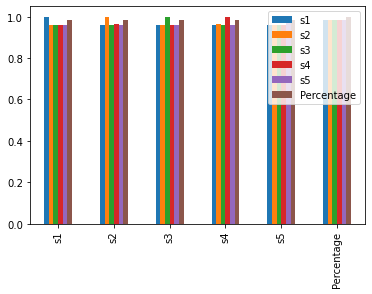

In [10]:
data.corr().plot(kind='bar')

In [14]:
grades = {
    "A+":7,
    "A":6,
    "B":5,
    "C":4,
    "D":3,
    "E":2,
    "Fail":1
}

data['Grade1'] = data.Grade.map(grades)# map with dictionary
data

,s1,s2,s3,s4,s5,Percentage,Grade,Grade1
2875,77,74,74,77,71,74.6,A,6
4717,36,35,38,33,34,35.2,E,2
5305,71,75,78,77,74,75.0,A,6
917,34,36,37,34,38,35.8,E,2
5455,52,50,54,55,54,53.0,C,4
...,...,...,...,...,...,...,...,...
7396,15,25,12,7,28,17.4,Fail,1
6104,72,78,74,76,72,74.4,A,6
3671,60,65,66,67,62,64.0,B,5
7613,46,40,47,40,47,44.0,D,3


<AxesSubplot:>

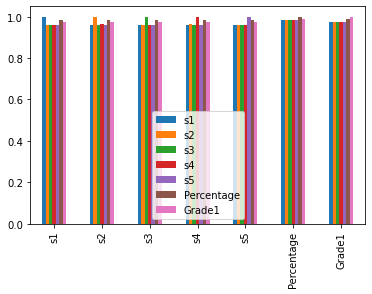

In [15]:
data.corr().plot(kind='bar')

<AxesSubplot:>

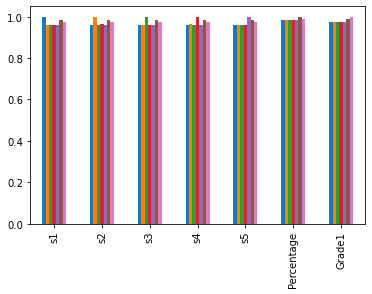

In [16]:
data.corr().plot(kind='bar', legend=False)

In [18]:
data[["Percentage","Grade1"]].corr()

,Percentage,Grade1
Percentage,1.00000,0.98916
Grade1,0.98916,1.00000


# Find Grade (Rules) with Machine Learning

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

<img src="https://www.researchgate.net/profile/Nimmisha-Shajihan/publication/347447352/figure/fig3/AS:970048604741634@1608289018974/Performance-measurement-TP-TN-FP-FN-are-the-parameters-used-in-the-evaluation-of.jpg">
<img src="https://miro.medium.com/max/974/1*CNWo23_VnUJPXdfrqbiB0g.jpeg">

<img src="https://static.packt-cdn.com/products/9781785282287/graphics/B04223_10_02.jpg">

<img src="https://i.ytimg.com/vi/ji48Lz6amMc/maxresdefault.jpg">

In [20]:
data[["Percentage","Grade1"]].corr()

,Percentage,Grade1
Percentage,1.00000,0.98916
Grade1,0.98916,1.00000


# Now select the feature based on above stats technique

In [22]:
data.head()

,s1,s2,s3,s4,s5,Percentage,Grade,Grade1
2875,77,74,74,77,71,74.6,A,6
4717,36,35,38,33,34,35.2,E,2
5305,71,75,78,77,74,75.0,A,6
917,34,36,37,34,38,35.8,E,2
5455,52,50,54,55,54,53.0,C,4


In [25]:
feature = ['Percentage']

X = data[feature]
Y = data.Grade



In [29]:
print(type(X))
X.head()

<class 'pandas.core.frame.DataFrame'>


,Percentage
2875,74.6
4717,35.2
5305,75.0
917,35.8
5455,53.0


In [28]:
print(type(Y))
Y.head()

<class 'pandas.core.series.Series'>


2875    A
4717    E
5305    A
917     E
5455    C
Name: Grade, dtype: object

# Split data in Training and Test dataset
* X_train, X_test 
* Y_train, Y_test

In [35]:
print("X len",len(X),"Y len",len(Y))
print("train X",int(54432*70/100))
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=True)

print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

X len 54432 Y len 54432
train X 38102
38102
38102
16330
16330


# Classifier

In [36]:
clf = DecisionTreeClassifier()

In [37]:
clf = clf.fit(X_train, Y_train)

https://www.google.com/search?q=entropy+and+gini+index+decision+tree&source=lmns&tbm=vid&bih=636&biw=1296&hl=en&sa=X&ved=2ahUKEwjA7oW31J79AhXhpCcCHXgrAp0Q_AUoAnoECAEQAg

* entropy
* gini index

In [38]:
X_test

,Percentage
321,64.4
6284,75.4
5622,62.8
4205,52.6
3359,55.0
...,...
6507,13.8
4515,63.6
6067,11.4
5330,74.0


In [48]:
Y_predict = clf.predict(X_test)
Y_predict

array(['B', 'A', 'B', ..., 'Fail', 'A', 'D'], dtype=object)

In [46]:
abc = X_test.copy()
abc['Actual_Y'] = Y_test
abc['predication'] = clf.predict(X_test)# add prediction column

abc

,Percentage,Actual_Y,predication
321,64.4,B,B
6284,75.4,A,A
5622,62.8,B,B
4205,52.6,C,C
3359,55.0,C,C
...,...,...,...
6507,13.8,Fail,Fail
4515,63.6,B,B
6067,11.4,Fail,Fail
5330,74.0,A,A


In [50]:
print(metrics.classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00      2359
          A+       1.00      1.00      1.00      2320
           B       1.00      1.00      1.00      2350
           C       1.00      1.00      1.00      2343
           D       1.00      1.00      1.00      2313
           E       1.00      1.00      1.00      2259
        Fail       1.00      1.00      1.00      2386

    accuracy                           1.00     16330
   macro avg       1.00      1.00      1.00     16330
weighted avg       1.00      1.00      1.00     16330



In [64]:
clf.predict([[31]])

array(['Fail'], dtype=object)

# Display learning Rules

In [65]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(418.5, 498.3, 'X[0] <= 79.2\ngini = 0.857\nsamples = 38102\nvalue = [5417, 5456, 5426, 5433, 5463, 5517, 5390]\nclass = y[5]'),
 Text(334.8, 407.70000000000005, 'X[0] <= 39.2\ngini = 0.833\nsamples = 32646\nvalue = [5417, 0, 5426, 5433, 5463, 5517, 5390]\nclass = y[5]'),
 Text(167.4, 317.1, 'X[0] <= 31.2\ngini = 0.5\nsamples = 10907\nvalue = [0, 0, 0, 0, 0, 5517, 5390]\nclass = y[5]'),
 Text(83.7, 226.5, 'gini = 0.0\nsamples = 5390\nvalue = [0, 0, 0, 0, 0, 0, 5390]\nclass = y[6]'),
 Text(251.10000000000002, 226.5, 'gini = 0.0\nsamples = 5517\nvalue = [0, 0, 0, 0, 0, 5517, 0]\nclass = y[5]'),
 Text(502.20000000000005, 317.1, 'X[0] <= 49.1\ngini = 0.75\nsamples = 21739\nvalue = [5417, 0, 5426, 5433, 5463, 0, 0]\nclass = y[4]'),
 Text(418.5, 226.5, 'gini = 0.0\nsamples = 5463\nvalue = [0, 0, 0, 0, 5463, 0, 0]\nclass = y[4]'),
 Text(585.9, 226.5, 'X[0] <= 59.2\ngini = 0.667\nsamples = 16276\nvalue = [5417, 0, 5426, 5433, 0, 0, 0]\nclass = y[3]'),
 Text(502.20000000000005, 135.8999999

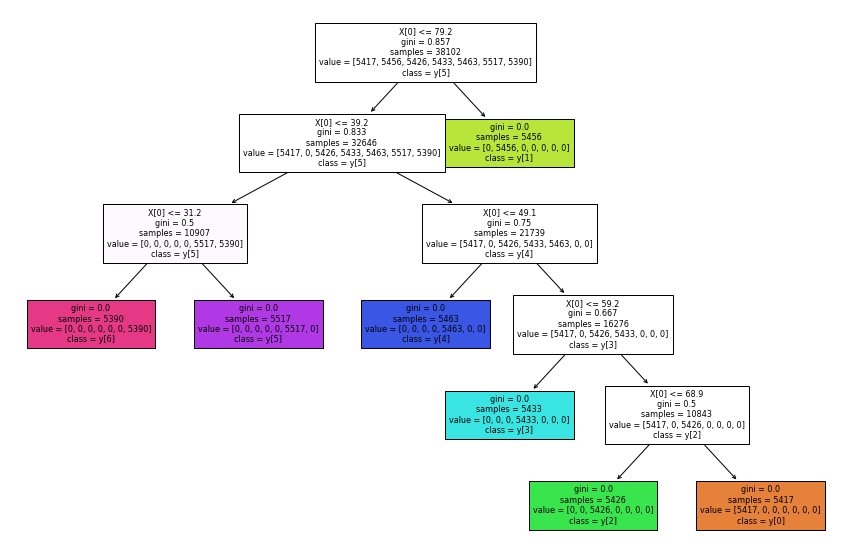

In [67]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True, class_names=True, fontsize=8)

<img src="https://www.researchgate.net/profile/Jessica-Pickles-2/publication/339279807/figure/fig1/AS:891889284829201@1589654384981/Random-forests-are-collections-of-randomised-decision-trees-A-A-single-decision-tree.ppm">